In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

numpy <- matrix algebra and calculation  
uses numpy array which is a row major data structure

pandas <- stats and data analysis  
uses pandas dataframe which is a column major data structure

step 1. super or unsuper (type of learning)         
step 2. regression or classification or clustering or association (type of task)


---



In [ ]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df[df.columns[2]]

0        15.0
1        19.0
2        17.0
3        14.0
4        20.0
         ... 
16995    52.0
16996    36.0
16997    17.0
16998    19.0
16999    52.0
Name: housing_median_age, Length: 17000, dtype: float64

**df.isna().sum()** is used for checking that our data does not contain a missing value or a NaN value

Two types of calculation performed in python:- 
*   lazy : uses yield in a fun like-range fun 
*   eager : uses return in a fun like-pandas i.e., we don't use it for big data\

we use pyspark for big data

**big data** = *when the size of training and testing data > ram size*

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

input <- input features or independent variables  
output <- target features or dependent variables

covariance is the variance for the case when two random variables co-exist together.

four compulsory observations/properties about the covariance matrix   
1.square matrix [where n*n]   
2.symmetric matrix [where upper triangle == lower triangle]  
3.cov(x,y) == cov(y,x)       
4.the dig is the var of each variable. 

-♾ <= cov <= ♾  
cov has 2 parts : 1.sign (+ or -)  2.magnitude(number part)  
Here, sign determine the relationship that can be 
A. direct (where x will increase then y will also increase and vice versa.)  
B. indirect (if x increase then y will decrease and vice versa.)   
Here, mag defines that the relation between the random variables is stong(in graph we can identitfy the line) or weak(we can not identify the line in the scatter plot)

person corelation coefficient : r of x,y  
cov(x,y) / (sd of x * sd of y)  
it lies between -1 <= r of x,y <= 1  


**Fake data**

,X,Y
X,1.000000,0.669395
Y,0.669395,1.000000


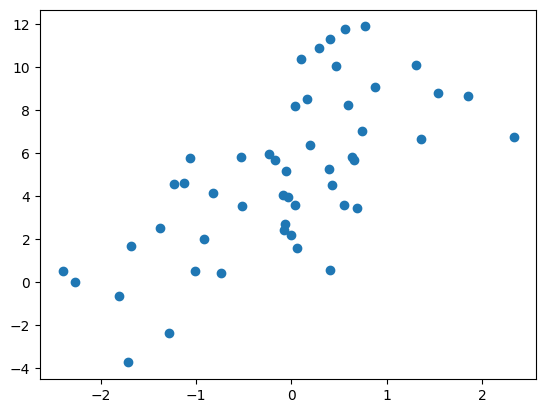

In [ ]:
x = np.random.normal(loc=0,scale=1,size=50)
y = (2*x) + 5 + np.random.normal(loc=0,scale=3,size=50)
fake = pd.DataFrame(data={"X":x,"Y":y})
plt.scatter(x,y)
fake.cov()
fake.corr()

prediction of quality related data is classification  
prediction of quantity(related to any form of units : cm,euro,kg,mass,speed,etc.) related data is regression  
ground truth label = output column = y lable = target feature

dividing data into 2 parts input features an questions and output feature as answer

In [ ]:
question  = df.iloc[:,:-1]
answer = df.iloc[:,-1]

In [ ]:
from sklearn.linear_model import LinearRegression
algo = LinearRegression()
algo.fit(question,answer)
predictions = algo.predict(question)
mse = np.mean((predictions - answer)**2)
rmse = np.sqrt(mse)

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [ ]:
matrix = df.corr()

In [ ]:
a = abs(matrix['median_house_value'])>=0.1

In [ ]:
a = a[a==1]

In [ ]:
b = df[a.index]

In [ ]:
b

,latitude,housing_median_age,total_rooms,median_income,median_house_value
0,34.19,15.0,5612.0,1.4936,66900.0
1,34.40,19.0,7650.0,1.8200,80100.0
2,33.69,17.0,720.0,1.6509,85700.0
3,33.64,14.0,1501.0,3.1917,73400.0
4,33.57,20.0,1454.0,1.9250,65500.0
...,...,...,...,...,...
16995,40.58,52.0,2217.0,2.3571,111400.0
16996,40.69,36.0,2349.0,2.5179,79000.0
16997,41.84,17.0,2677.0,3.0313,103600.0
16998,41.80,19.0,2672.0,1.9797,85800.0


In [ ]:
new_question = b.iloc[:,0:4] 

In [ ]:
new_question

,latitude,housing_median_age,total_rooms,median_income
0,34.19,15.0,5612.0,1.4936
1,34.40,19.0,7650.0,1.8200
2,33.69,17.0,720.0,1.6509
3,33.64,14.0,1501.0,3.1917
4,33.57,20.0,1454.0,1.9250
...,...,...,...,...
16995,40.58,52.0,2217.0,2.3571
16996,40.69,36.0,2349.0,2.5179
16997,41.84,17.0,2677.0,3.0313
16998,41.80,19.0,2672.0,1.9797


In [ ]:
algo.fit(new_question,answer)

LinearRegression()

In [ ]:
predictions = algo.predict(new_question)
predictions

array([ 97273.71981984, 125380.69015186,  92433.73222587, ...,
       118232.12115153,  77858.65668167, 189664.51046922])

In [ ]:
mse = np.mean((predictions - answer)**2)

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

79817.22603819976

1.data filtering (by selecting the input features those who has high correlation with target feature) 

---


2.data normalization  
types of normalization :  
min normalization(each column will be divided by min of data) ,  
max normalization(each column will be divided by min of data) ,  
standard normalization(mostly used)(converting the data into the z score)  

---


3.data filtering (by selecting those input features which do not have high correlation with each other but have a high correlation with the target,reason ,because we will not be able to create a good vector space to be learnt in linear algebra) this can be solved by pca or feature selection
pca - uses dimension reduction by transforming data  
feature selection - uses direction inspection over the persorn correlation matrix

---


4.

In [ ]:
new_question = (new_question-new_question.mean())/new_question.std()
answer = (answer-answer.mean())/answer.std()

In [ ]:
new_question

,latitude,housing_median_age,total_rooms,median_income
0,-0.671500,-1.079639,1.361655,-1.252506
1,-0.573248,-0.761850,2.296540,-1.081451
2,-0.905436,-0.920744,-0.882436,-1.170071
3,-0.928830,-1.159087,-0.524171,-0.362590
4,-0.961581,-0.682402,-0.545731,-1.026424
...,...,...,...,...
16995,2.318197,1.859916,-0.195722,-0.799975
16996,2.369663,0.588757,-0.135170,-0.715705
16997,2.907715,-0.920744,0.015292,-0.446650
16998,2.889000,-0.761850,0.012998,-0.997758


In [ ]:
algo.fit(new_question,answer)
predictions = algo.predict(new_question)
predictions

array([-0.94864305, -0.70630767, -0.99037293, ..., -0.76794189,
       -1.11603772, -0.15205923])

In [ ]:
mse = np.mean((predictions - answer)/answer**2)

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

1011.0710443767184

In [ ]:
answer

0       -1.210522
1       -1.096713
2       -1.048430
3       -1.154480
4       -1.222593
           ...   
16995   -0.826848
16996   -1.106197
16997   -0.894099
16998   -1.047568
16999   -0.971696
Name: median_house_value, Length: 17000, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
percentage = r2_score(y_true = answer,y_pred=predictions)
percentage

0.5263861351522849

different dimension reduction algos':-  
pca - principal components analysis  
lda - linear discriminant analysis  
lsa - latent semantic analysis (used in chatgpt :)

In [ ]:
question = (question-question.mean())/question.std()

In [ ]:
question

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619288,-0.671500,-1.079639,1.361655,1.764152,-0.361173,-0.075996,-1.252506
1,2.539494,-0.573248,-0.761850,2.296540,3.230346,-0.261858,-0.099401,-1.081451
2,2.494610,-0.905436,-0.920744,-0.882436,-0.866931,-0.955326,-0.999223,-1.170071
3,2.489623,-0.928830,-1.159087,-0.524171,-0.480216,-0.796769,-0.715753,-0.362590
4,2.489623,-0.961581,-0.682402,-0.545731,-0.506313,-0.701809,-0.622130,-1.026424
...,...,...,...,...,...,...,...,...
16995,-2.342894,2.318197,1.859916,-0.195722,-0.344985,-0.455262,-0.343862,-0.799975
16996,-2.347881,2.369663,0.588757,-0.135170,-0.027072,-0.205230,-0.094200,-0.715705
16997,-2.362842,2.907715,-0.920744,0.015292,-0.019955,-0.161670,-0.117606,-0.446650
16998,-2.362842,2.889000,-0.761850,0.012998,0.029868,-0.114626,-0.060392,-0.997758


In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
for i in range(8,0,-1):
  pca = PCA(n_components=i)
  x = pca.fit_transform(question)
  obj = LinearRegression()
  obj.fit(x,answer)
  p = obj.predict(x)
  print(r2_score(y_true = answer,y_pred = p))

0.6413378529502689
0.6403406940196337
0.6302927692582099
0.5417640911270948
0.528361210858408
0.32096848270613765
0.0065215311612544236
0.003419012049628689


using in built pca as well as user built pca

In [ ]:
question = df.drop(labels=df.columns[-1],axis = 1)
question

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [ ]:
pca = PCA()

In [ ]:
projected_X = pca.fit_transform(X=question)

In [ ]:
projected_X = pd.DataFrame(columns=["feature_"+str(x) for x in range(1,9)],data=projected_X)

In [ ]:
projected_X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,2548.462950,-1675.368431,-176.694599,451.797385,1.794425,-3.878558,-1.179346,1.492993
1,4486.293020,-2466.352693,-308.054162,839.231263,17.610251,-3.024562,1.696091,1.033831
2,-2271.258841,-155.221708,14.677030,33.190517,-14.830972,-4.562708,-2.722381,1.760112
3,-1465.339874,-328.773036,-23.775044,54.142843,-15.831044,-4.701464,-1.191306,1.843502
4,-1456.886292,-208.071528,-23.881561,24.562863,-10.580953,-4.731190,-2.508884,1.770503
...,...,...,...,...,...,...,...,...
16995,-639.653398,-289.531050,26.383700,-10.491428,22.731611,6.372973,-1.339104,-0.009410
16996,-366.069656,-78.789431,-58.095235,13.515137,7.018859,6.862207,-0.440339,-0.038868
16997,-57.434978,-184.177704,3.508883,21.144013,-10.865868,7.924719,-0.375002,0.481535
16998,-32.288309,-130.812676,-16.130231,20.183012,-8.996086,7.988086,-1.266766,0.368891


In [ ]:
projected_X.cov()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
feature_1,6.077377e+06,1.862755e-11,3.102308e-11,-1.177918e-12,-8.015153e-12,-3.424181e-14,1.284068e-13,-8.553766e-14
feature_2,1.862755e-11,2.849272e+05,-4.718522e-12,3.711813e-12,1.262453e-12,-4.160380e-13,-2.172215e-14,-1.107509e-14
feature_3,3.102308e-11,-4.718522e-12,3.035111e+04,-3.707532e-12,-1.639862e-13,-4.301628e-14,8.052177e-15,-1.205820e-14
feature_4,-1.177918e-12,3.711813e-12,-3.707532e-12,2.621575e+03,-2.568136e-14,-3.948509e-14,9.443250e-15,-6.834987e-15
feature_5,-8.015153e-12,1.262453e-12,-1.639862e-13,-2.568136e-14,1.363932e+02,3.878956e-15,-1.072565e-15,1.205486e-15
feature_6,-3.424181e-14,-4.160380e-13,-4.301628e-14,-3.948509e-14,3.878956e-15,8.073986e+00,1.177062e-15,-4.961552e-16
feature_7,1.284068e-13,-2.172215e-14,8.052177e-15,9.443250e-15,-1.072565e-15,1.177062e-15,2.397131e+00,4.296946e-16
feature_8,-8.553766e-14,-1.107509e-14,-1.205820e-14,-6.834987e-15,1.205486e-15,-4.961552e-16,4.296946e-16,2.444247e-01


In [ ]:
pca.get_covariance()

array([[ 4.02069233e+00, -3.96518544e+00, -2.88355242e+00,
         2.05489998e+02,  6.06853288e+01,  2.34017167e+02,
         4.59746458e+01, -5.92481156e-02],
       [-3.96518544e+00,  4.56822140e+00,  4.42652137e-01,
        -1.80652575e+02, -6.24971957e+01, -2.72963262e+02,
        -6.15585795e+01, -3.27506114e-01],
       [-2.88355242e+00,  4.42652137e-01,  1.58430983e+02,
        -9.90499269e+03, -1.70002683e+03, -4.27500196e+03,
        -1.46531200e+03, -2.78442789e+00],
       [ 2.05489998e+02, -1.80652575e+02, -9.90499269e+03,
         4.75216923e+06,  8.53059831e+05,  2.15236872e+06,
         7.70353377e+05,  8.12729998e+02],
       [ 6.06853288e+01, -6.24971957e+01, -1.70002683e+03,
         8.53059831e+05,  1.77661788e+05,  4.26326445e+05,
         1.58982941e+05, -1.08535966e+01],
       [ 2.34017167e+02, -2.72963262e+02, -4.27500196e+03,
         2.15236872e+06,  4.26326445e+05,  1.31756642e+06,
         4.01317219e+05, -1.39658833e+00],
       [ 4.59746458e+01, -6.155857

In [ ]:
pca.singular_values_

array([3.21417700e+05, 6.95950997e+04, 2.27142804e+04, 6.67563904e+03,
       1.52267805e+03, 3.70472239e+02, 2.01863382e+02, 6.44590968e+01])

In [ ]:
np.mean(df,axis=0)

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64

In [ ]:
zero = question - question.mean()
n=17000

In [ ]:
covarian = 1/n * np.matmul(np.array(zero).T,np.array(zero))
covarian == question.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,False,False,False,False,False,False,False,False
latitude,False,False,False,False,False,False,False,False
housing_median_age,False,False,False,False,False,False,False,False
total_rooms,False,False,False,False,False,False,False,False
total_bedrooms,False,False,False,False,False,False,False,False
population,False,False,False,False,False,False,False,False
households,False,False,False,False,False,False,False,False
median_income,False,False,False,False,False,False,False,False


In [ ]:
factors = np.linalg.svd(covarian)
factors

(array([[-4.87779818e-05,  4.26597318e-04,  5.96219142e-05,
          4.44385427e-03,  1.75541809e-02,  6.74717920e-01,
          1.55069103e-01,  7.21374533e-01],
        [ 4.83304787e-05, -5.92830386e-04,  1.77408305e-04,
         -1.06187208e-03, -1.74489015e-03, -7.32744210e-01,
          2.49217466e-02,  6.80044316e-01],
        [ 1.81139134e-03,  1.66615756e-03, -3.76947307e-03,
         -1.92770694e-02, -9.99629800e-01,  1.37056902e-02,
         -3.08899604e-03,  1.22883216e-02],
        [-8.78741371e-01, -4.53645869e-01,  1.47944433e-01,
         -1.10543662e-02, -2.69649914e-03,  2.38305870e-04,
          1.38217673e-03, -1.89670088e-04],
        [-1.61685692e-01,  5.45364032e-02, -7.45061966e-01,
          6.44666720e-01, -9.82541906e-03, -1.70970188e-03,
         -8.45312761e-03, -2.97587618e-04],
        [-4.24259252e-01,  8.83742060e-01,  1.93001366e-01,
          4.18662496e-02, -8.38430316e-04, -7.41671896e-04,
         -7.02897990e-04,  4.00401040e-05],
        [-1.4721

In [ ]:
pro_x = np.matmul(np.array(zero),factors[0])
pro_x.shape

(17000, 8)

In [ ]:
pro_x = pd.DataFrame(columns=["feature_"+str(x) for x in range(1,9)],data=pro_x)

In [ ]:
pro_x == projected_X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
16995,False,False,False,False,False,False,False,False
16996,False,False,False,False,False,False,False,False
16997,False,False,False,False,False,False,False,False
16998,False,False,False,False,False,False,False,False


In [ ]:
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
test.iloc[:,:-1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
algo.fit(df.iloc[:,:-1],df.iloc[:,-1])
predictions = algo.predict(test.iloc[:,:-1])

In [ ]:
from sklearn.metrics import r2_score
percentage = r2_score(y_true = test.iloc[:,-1],y_pred=predictions)
percentage

0.6195057678312047